# Grockit Competition

In [1]:
# dependencies
import numpy as np
import pandas as pd

In [2]:
# data locations
train_path = '/mnt/azurefs/data/grockit/training.csv'
test_path = '/mnt/azurefs/data/grockit/test.csv'
valid_train_path = '/mnt/azurefs/data/grockit/valid_training.csv'
valid_test_path = '/mnt/azurefs/data/grockit/valid_test.csv'
test_sorted_path = '/mnt/azurefs/data/grockit/test_sorted.csv'
solution_sorted_path = '/mnt/azurefs/data/grockit/solution_sorted.csv'
sample_path = '/mnt/azurefs/data/grockit/benchmark_lmer_submission.csv'
models_path = '/mnt/azurefs/data/grockit/models/'
results_path = 'data/'

In [3]:
# load data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_path)
valid_train = pd.read_csv(valid_train_path)
valid_test = pd.read_csv(valid_test_path)
test_sorted = pd.read_csv(test_sorted_path)
solution = pd.read_csv(solution_sorted_path)

In [4]:
def format_date_times(df):
    df['round_started_at'] = pd.to_datetime(df['round_started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    df['answered_at'] = pd.to_datetime(df['answered_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    df['deactivated_at'] = pd.to_datetime(df['deactivated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')    
    return(df)

In [5]:
# format date times - some 0000-00-00 00:00:00, errors=coerce will give NaT for those


train['round_started_at'] = pd.to_datetime(train['round_started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
train['answered_at'] = pd.to_datetime(train['answered_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
train['deactivated_at'] = pd.to_datetime(train['deactivated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

valid_train['round_started_at'] = pd.to_datetime(valid_train['round_started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
valid_train['answered_at'] = pd.to_datetime(valid_train['answered_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
valid_train['deactivated_at'] = pd.to_datetime(valid_train['deactivated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

valid_test['round_started_at'] = pd.to_datetime(valid_test['round_started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
valid_test['answered_at'] = pd.to_datetime(valid_test['answered_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
valid_test['deactivated_at'] = pd.to_datetime(valid_test['deactivated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

test['round_started_at'] = pd.to_datetime(test['round_started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['answered_at'] = pd.to_datetime(test['answered_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['deactivated_at'] = pd.to_datetime(test['deactivated_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Data Exploration

In [5]:
solution['user_id'].nunique()

82926

In [6]:
sample_submission['user_id'].nunique()

93100

In [7]:
test_sorted.head()

,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,game_type,num_players,date_of_test,question_set_id
0,0,2928,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Author's Purpose or Method|Humanities|Meaning-...,2011-08-26 16:59:06,PracticeGame,1,NaN,687
1,1,1668,MultipleChoiceOneCorrect,gmat,GMAT Quantitative,Problem Solving,Algebra|Interest|Problem Solving|Word Problems,2011-02-14 08:11:20,CompetitiveGame,1,NaN,2952
2,2,4629,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Main Idea of Paragraph or Passage|Order and Or...,2011-11-08 16:31:36,DiagnosticGame,1,NaN,701
3,4,2488,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Critical Reasoning,CR: Resolve Argument|Critical Reasoning,2010-02-09 04:53:41,PracticeGame,2,2010-05-24,2256
4,5,4505,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Improving Sentences|Parallel Structure|Word ch...,2011-01-17 18:23:14,PracticeGame,1,NaN,1318


In [8]:
test.head()

,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,answered_at,deactivated_at,game_type,num_players,date_of_test,question_set_id
0,0,5186,0,0,2,10,62 91 127 206,2011-08-26 16:58:47,2011-08-26 16:59:01,2011-08-26 16:59:03,7,1,NaN,3049
1,1,547,0,1,4,9,36 77 82 161 205,2011-02-14 08:10:03,2011-02-14 08:11:17,2011-02-14 08:11:18,2,1,NaN,1859
2,2,1613,0,0,2,10,62 122 206 253,2011-11-08 16:31:28,2011-11-08 16:31:34,2011-11-08 16:31:36,5,1,NaN,3142
3,4,2545,0,1,5,0,28 49,2010-02-09 04:52:29,2010-02-09 04:53:17,2010-02-09 04:53:30,7,2,2010-05-24,1239
4,5,2303,0,2,8,3,101 103 275,2011-01-17 18:22:30,2011-01-17 18:23:00,2011-01-17 18:23:02,7,1,NaN,455


In [9]:
train.head()

,correct,outcome,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,answered_at,deactivated_at,answer_id,game_type,num_players,date_of_test,question_set_id
0,0,2,85818,5560,0,1,5,14,222 233 240 246,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,6540,7,1,NaN,1567
1,1,1,85818,4681,0,1,5,0,24 49,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,4742,7,1,NaN,1227
2,1,1,85818,1529,0,1,5,0,31 49,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,4309,7,1,NaN,1148
3,1,1,85818,2908,0,1,5,0,31 49,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,4408,7,1,NaN,1168
4,1,1,85818,1773,0,1,5,11,183 194 207,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,10822,7,1,NaN,2318


In [10]:
train['outcome'].value_counts()

1    2655927
2    1610210
4     562566
3      22519
0        253
Name: outcome, dtype: int64

In [153]:
sample_submission.head()

,user_id,outcome
0,0,0.458734
1,1,0.801818
2,2,0.482292
3,4,0.339889
4,5,0.508015


In [154]:
print(sample_submission.shape)
print(test.shape)

(93100, 2)
(93100, 14)


# Build Data

Steffen Rendle used user_id, question_id, time_to_answer (engineered), subtrack_name, game_type.  Following fast.ai Part 1 - Lesson 4 to embed data for a neurel network. 

In [6]:
# get unique values
users = train.user_id.unique()
questions = train.question_id.unique()
subtracks = train.subtrack_name.unique()
games = train.game_type.unique()

In [7]:
# reload data, it gets modified here
#train = pd.read_csv(train_path)
valid_train = pd.read_csv(valid_train_path)
valid_test = pd.read_csv(valid_test_path)
test = pd.read_csv(test_path)

valid_train = format_date_times(valid_train)
valid_test = format_date_times(valid_test)
test = format_date_times(test)

# dictionaries mapping indicies to contiguous integers
user2idx = {o:i for i,o in enumerate(users)}
question2idx = {o:i for i,o in enumerate(questions)}
subtrack2idx = {o:i for i,o in enumerate(subtracks)}
games2idx = {o:i for i,o in enumerate(games)}

# re-index indentifiers
valid_train.user_id = valid_train.user_id.apply(lambda x: user2idx[x])
valid_train.question_id = valid_train.question_id.apply(lambda x: question2idx[x])
valid_train.subtrack_name = valid_train.subtrack_name.apply(lambda x: subtrack2idx[x])
valid_train.game_type = valid_train.game_type.apply(lambda x: games2idx[x])

valid_test.user_id = valid_test.user_id.apply(lambda x: user2idx[x])
valid_test.question_id = valid_test.question_id.apply(lambda x: question2idx[x])
valid_test.subtrack_name = valid_test.subtrack_name.apply(lambda x: subtrack2idx[x])
valid_test.game_type = valid_test.game_type.apply(lambda x: games2idx[x])

test.user_id = test.user_id.apply(lambda x: user2idx[x])
test.question_id = test.question_id.apply(lambda x: question2idx[x])
test.subtrack_name = test.subtrack_name.apply(lambda x: subtrack2idx[x])
test.game_type = test.game_type.apply(lambda x: games2idx[x])

## Time to Answer Feature

# Model

In [ ]:
# dependencies
import keras
from keras.models import Model
from keras.layers import Input, Embedding, merge
from keras.regularizers import l2, l1, l1l2
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

import theano
from theano import tensor as T

Using Theano backend.


In [ ]:
n_factors = 50
np.random.seed = 56756756

n_users = valid_train.user_id.nunique()
n_questions = valid_train.question_id.nunique()
n_subtracks = valid_train.subtrack_name.nunique()
n_games = valid_train.game_type.nunique()
n_users, n_questions, n_subtracks, n_games

In [78]:
??Embedding

In [ ]:
# helper function from fast.ai Lesson 4
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, W_regularizer=l2(reg))(inp)

def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)

In [ ]:
# embed user, question, subtrack, game
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
question_in, q = embedding_input('question_in', n_questions, n_factors, 1e-4)
subtrack_in, s = embedding_input('subtrack_in', n_subtracks, n_factors, 1e-4)
game_in, g = embedding_input('game_in', n_games, n_factors, 1e-4)

In [ ]:
2+2

In [48]:
time_in = Input(shape=(1,), dtype='float32', name='time_in')

In [49]:
# create bias terms
ub = create_bias(user_in, n_users)
qb = create_bias(question_in, n_questions)
subtrack_in, s = embedding_input('subtrack_in', n_subtracks, n_factors, 1e-4)
game_in, g = embedding_input('game_in', n_games, n_factors, 1e-4)

## Capped Binomial Deviance

In [13]:
def capped_binomial_deviance(y_true, y_pred):
    """Another cross entropy loss
    
    Loss used in What Do You Know? competition
    Built-in version does not use base-10 logs and
    caps at different values
    """
    y_pred = T.clip(y_pred, 0.01, 0.99)
    return keras.backend.mean(-(y_true * T.log10(y_pred) + (1.0 - y_true) * T.log10(1.0 - y_pred)), axis=-1)

In [17]:
# test loss function
y_true = T.vector()
y_pred = T.vector()
a = capped_binomial_deviance(y_true, y_pred)
a.eval({y_true: np.array([0, 0]).astype(np.float32), y_pred: np.array([.5, .5]).astype(np.float32)})

array(0.3010300099849701, dtype=float32)

In [53]:
# python version
def cbd(y_true, y_pred):
    y_pred = np.clip(y_pred, .01, .99)
    return np.mean(-(y_true * np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)))

In [149]:
# testing
cbd(np.array([1, 1]), np.array([.5, .5]))

0.3010299956639812

In [56]:
# compare predictions
cbd(valid_test.correct, np.clip(pred[:,0], .01, .99))

0.27697229385375977

In [60]:
# evaluate theano version
a.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

NameError: name 'a' is not defined

## Linear Model
* TODO: how to combine 4 vectors, 'dot' only combines two

In [50]:
n_factors = 50
np.random.seed = 56756756
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
question_in, q = embedding_input('question_in', n_questions, n_factors, 1e-4)
subtrack_in, s = embedding_input('subtrack_in', n_subtracks, n_factors, 1e-4)
game_in, g = embedding_input('game_in', n_games, n_factors, 1e-4)
ub = create_bias(user_in, n_users)
qb = create_bias(question_in, n_questions)
subtrack_in, s = embedding_input('subtrack_in', n_subtracks, n_factors, 1e-4)
game_in, g = embedding_input('game_in', n_games, n_factors, 1e-4)

In [74]:
# linear model - TODO: how to get a "4D dot product"
x = merge([u, q], mode='dot')
x = Flatten()(x)
x = merge([x, ub], mode='sum')
x = merge([x, qb], mode='sum')
#x = merge([x, sb], mode='sum')
#x = merge([x, gb], mode='sum')
model = Model([user_in, question_in], x)
model.compile(Adam(0.001), loss=capped_binomial_deviance)

In [75]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
question_in (InputLayer)         (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_29 (Embedding)         (None, 1, 50)         8955300     user_in[0][0]                    
____________________________________________________________________________________________________
embedding_30 (Embedding)         (None, 1, 50)         302250      question_in[0][0]                
___________________________________________________________________________________________

In [70]:
# linear model - TODO: how to get a "4D dot product"
x = merge([u, q, s, g], mode='mul')
#x = merge([x], mode='sum')
x = Flatten()(x)
x = merge([x], mode='sum')
#x = merge([x, ub], mode='sum')
#x = merge([x, qb], mode='sum')
#x = merge([x, sb], mode='sum')
#x = merge([x, gb], mode='sum')
model = Model([user_in, question_in, subtrack_in, game_in], x)
model.compile(Adam(0.001), loss=capped_binomial_deviance)

TypeError: A Merge should only be applied to a list of layers with at least 2 elements. Found: [<keras.layers.core.Flatten object at 0x7f11bcf41160>]

In [67]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
question_in (InputLayer)         (None, 1)             0                                            
____________________________________________________________________________________________________
subtrack_in (InputLayer)         (None, 1)             0                                            
____________________________________________________________________________________________________
game_in (InputLayer)             (None, 1)             0                                            
___________________________________________________________________________________________

In [52]:
model.fit([valid_train.user_id, valid_train.question_id], valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id], valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 126s - loss: 0.3544 - val_loss: 0.2822


In [39]:
model.fit([valid_train.user_id, valid_train.question_id], valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id], valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
1203200/4763362 [======>.......................] - ETA: 153s - loss: 11.8408

KeyboardInterrupt: 

In [28]:
model.optimizer.lr = 1e-5
model.fit([valid_train.user_id, valid_train.question_id], valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id], valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 125s - loss: 0.2457 - val_loss: 0.2689


In [26]:
pred = model.predict([valid_test.user_id, valid_test.question_id])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.2686835527420044, dtype=float32)

## Neural Network Model

* TODO: Use the correct loss function
* TODO: Train model, ~35 min/epoch


In [77]:
x = merge([u, q, g], mode='concat')
#x = merge([u ,q])
x = Flatten()(x)
#x = BatchNormalization()
#x = Dropout(0.3)(x)
#x = Dense(140, activation='relu')(x)
#x = BatchNormalization()
#x = Dropout(0.75)(x)
x = Dense(70, activation='relu')(x)
x = Dense(1)(x)
nn = Model([user_in, question_in, game_in], x)
#nn = Model([user_in, question_in], x)
nn.compile(Adam(0.001), loss='mse', metrics=['accuracy'])

In [84]:
# 3 features
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.game_type],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.game_type],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 137s - loss: 0.2196 - val_loss: 0.2343


In [85]:
pred = nn.predict([valid_test.user_id, valid_test.question_id, valid_test.game_type])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.2696603834629059, dtype=float32)

In [14]:
# 2 features
nn.fit([valid_train.user_id, valid_train.question_id],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 128s - loss: 0.3085 - val_loss: 0.3003


In [20]:
nn.save_weights(models_path+'2features-01.h5')

In [64]:
pred = nn.predict([valid_test.user_id, valid_test.question_id])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.2632095217704773, dtype=float32)

In [19]:
# 4 features, gives a slight improvement... maybe
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.subtrack_name, valid_train.game_type],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 963s - loss: 0.3596 - val_loss: 0.3209


In [20]:
pred = nn.predict([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.2753365635871887, dtype=float32)

In [23]:
nn.save_weights(models_path+'4features-factors-01.h5')

In [67]:
pred = nn.predict([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.27586492896080017, dtype=float32)

In [134]:
# decreasing the learning rate slightly improves the model
nn.optimizer.lr = 1e-4
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.subtrack_name, valid_train.game_type],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 146s - loss: 0.2894 - val_loss: 0.2953


In [137]:
# decreasing the learning rate more appears to make things worse
nn.optimizer.lr = 1e-6
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.subtrack_name, valid_train.game_type],
          valid_train.correct, batch_size=256, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
 419840/4763362 [=>............................] - ETA: 481s - loss: 0.2959

KeyboardInterrupt: 

In [142]:
pred = nn.predict([valid_test.user_id, valid_test.question_id])#, valid_test.subtrack_name, valid_test.game_type])

In [23]:
%matplotlib inline

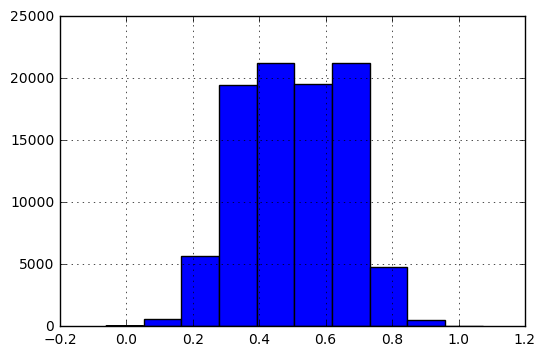

In [24]:
import matplotlib
pd.Series(pred[:,0]).hist()

# Adding More Features

In [7]:
def time_to_answer(x):
    temp = x['answered_at'] - x['round_started_at']
    temp = [x.seconds if not pd.isnull(x) else -9999 for x in temp]
    temp = [x / 300.0 for x in temp]
    temp = np.clip(temp, -1, 1)
    return temp

In [25]:
time_in = Input(shape=(1,), dtype='float32', name='time_in')

In [30]:
x = merge([u, q, s, g], mode='concat')
#x = merge([u ,q])
x = Flatten()(x)
x = merge([x , time_in], mode='concat')
x = Dropout(0.3)(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.75)(x)
x = Dense(1)(x)
nn = Model([user_in, question_in, subtrack_in, game_in, time_in], x)
#nn = Model([user_in, question_in], x)
nn.compile(Adam(0.001), loss=capped_binomial_deviance)

In [39]:
# 4 features, gives a slight improvement... maybe
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.subtrack_name, valid_train.game_type, time_to_answer(valid_train)],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type, time_to_answer(valid_test)],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 254s - loss: 0.2914 - val_loss: 0.3026


In [40]:
pred = nn.predict([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type, time_to_answer(valid_test)])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.27504798769950867, dtype=float32)

In [42]:
nn.save_weights(models_path+'5features-01.h5')

In [44]:
nn.optimizer.lr = 1e-4
nn.fit([valid_train.user_id, valid_train.question_id, valid_train.subtrack_name, valid_train.game_type, time_to_answer(valid_train)],
          valid_train.correct, batch_size=1024, nb_epoch=1, 
          validation_data=([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type, time_to_answer(valid_test)],
                           valid_test.correct))

Train on 4763362 samples, validate on 80075 samples
Epoch 1/1
4763362/4763362 [==============================] - 254s - loss: 0.2672 - val_loss: 0.2985


In [45]:
pred = nn.predict([valid_test.user_id, valid_test.question_id, valid_test.subtrack_name, valid_test.game_type, time_to_answer(valid_test)])
y_true = T.vector()
y_pred = T.vector()
loss = capped_binomial_deviance(y_true, y_pred)
loss.eval({y_true: valid_test.correct, y_pred: pred[:,0]})

array(0.2739352583885193, dtype=float32)

In [46]:
nn.save_weights(models_path+'5features-02.h5')

# Create Submission

In [49]:
# load model
model_name = '5features-02'
nn.load_weights(models_path + model_name + '.h5')
pred = nn.predict([test.user_id, test.question_id, test.subtrack_name, test.game_type, time_to_answer(test)])
pred = np.clip(pred, .01, .99)
sub = sample_submission.copy()
sub['outcome'] = pred
sub.to_csv(results_path + model_name +'.csv', index=False)

In [50]:
# doesnt seem to work with azure file share
from IPython.display import FileLink
FileLink(results_path + model_name + '.csv')

/home/slaterc/nbs/data/5features-02.csv